In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

***Load Data***

In [2]:
train_data=pd.read_csv("/home/albert/Downloads/titanic/train.csv")
test_data=pd.read_csv("/home/albert/Downloads/titanic/test.csv")
complex=[train_data,test_data]

***Functions***

In [3]:
def clean(df,col_list):
    df.drop(columns=col_list,inplace=True)
    return df

def calculate_mean_by_feature(data, target_variable, feature_variable):
    """
    Calculate the mean of the target variable grouped by the feature variable.
    """
    mean_by_feature = (data[[feature_variable, target_variable]]
                       .groupby([feature_variable], as_index=False)
                       .mean()
                       .sort_values(by=target_variable, ascending=False))
    return mean_by_feature


In [4]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [7]:
print(train_data.describe())
print(train_data.describe(include=['O']))

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
                       Name   Sex Ticket    Cabin Embarked
count                 

***Absolute Correlation of Numeric Variables with Survived***

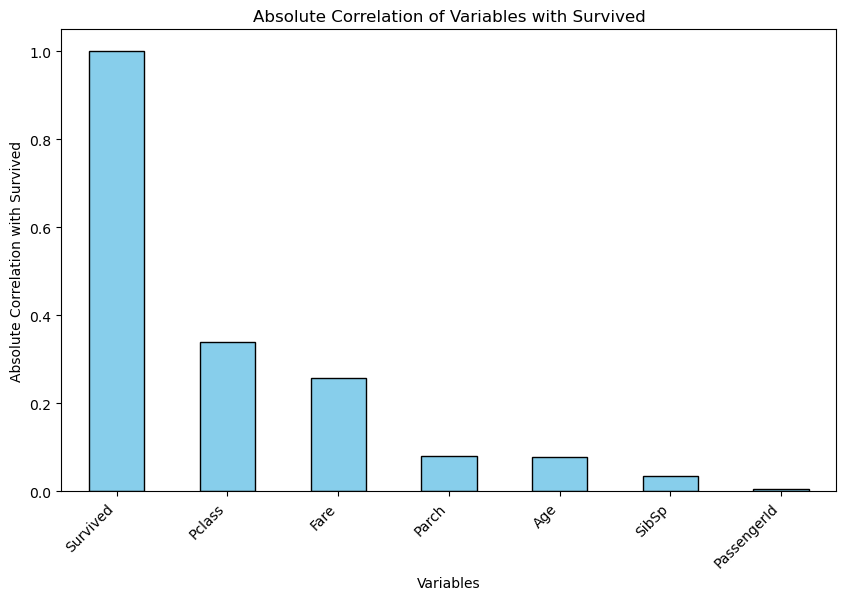

In [8]:
numeric_train_data = train_data.select_dtypes(include='number')

correlation_matrix = numeric_train_data.corr().abs()['Survived'].sort_values(ascending=False)

correlation_matrix.plot(kind='bar', xlabel='Variables', ylabel='Absolute Correlation with Survived', figsize=(10, 6), color='skyblue', edgecolor='black')

plt.title('Absolute Correlation of Variables with Survived')
plt.xticks(rotation=45, ha='right')
plt.show()

***Chi-square Test for 'Categorical Variables' and 'Survived' to detect correlation***

In [9]:
contingency_table = pd.crosstab(train_data['Embarked'], train_data['Survived'])
_, p_value, _, _ = chi2_contingency(contingency_table)
print("P-value:", p_value)

P-value: 1.769922284120912e-06


In [10]:
contingency_table = pd.crosstab(train_data['Sex'], train_data['Survived'])
_, p_value, _, _ = chi2_contingency(contingency_table)
print("P-value:", p_value)

P-value: 1.1973570627755645e-58


In [11]:
contingency_table = pd.crosstab(train_data['Ticket'], train_data['Survived'])
_, p_value, _, _ = chi2_contingency(contingency_table)
print("P-value:", p_value)

P-value: 0.01152729601163775


In [12]:
contingency_table = pd.crosstab(train_data['Name'], train_data['Survived'])
_, p_value, _, _ = chi2_contingency(contingency_table)
print("P-value:", p_value)

P-value: 0.484248151973633


***Mean Survival Rates***

In [13]:
mean_by_Pclass=calculate_mean_by_feature(train_data,'Survived','Pclass')
mean_by_Pclass

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
mean_by_Sex=calculate_mean_by_feature(train_data,'Survived','Sex')
mean_by_Sex

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [15]:
mean_by_SibSp=calculate_mean_by_feature(train_data,'Survived','SibSp')
mean_by_SibSp

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [16]:
mean_by_Parch=calculate_mean_by_feature(train_data,'Survived','Parch')
mean_by_Parch

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [17]:
mean_by_Embarked=calculate_mean_by_feature(train_data,'Survived','Embarked')
mean_by_Embarked

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


***Extracting Titles from Names, Cleaning and Mapping Titles***

In [18]:
for dataset in complex:
    dataset['Title']=dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

train_data['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [19]:
for dataset in complex:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [20]:
# le = LabelEncoder()
# train_data['Title_label']=le.fit_transform(train_data['Title'])
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in complex:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

***Handling Missing Values and Creating Age Categories***

In [21]:
for dataset in complex:
    dataset['Age'].fillna(dataset['Age'].dropna().median(), inplace=True)

age_ranges=pd.cut(train_data['Age'],5).unique()
age_ranges

[(16.336, 32.252], (32.252, 48.168], (48.168, 64.084], (0.34, 16.336], (64.084, 80.0]]
Categories (5, interval[float64, right]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] < (48.168, 64.084] < (64.084, 80.0]]

In [22]:
age_bins = [0, 16, 32, 48, 64, float('inf')]

for dataset in complex:
    dataset['Age_Category'] = pd.cut(dataset['Age'], bins=age_bins, labels=[0,1,2,3,4], right=False).astype(int)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2


***Creating FamilySize and IsAlone Features***

In [23]:
for dataset in complex:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [24]:
for dataset in complex:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


***Handling Missing Values in 'Embarked' Feature and Mapping***


In [25]:
freq_port = train_data.Embarked.dropna().mode()[0]
freq_port

for dataset in complex:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [26]:
embarked_mapping={'S': 0, 'C': 1, 'Q': 2}
for dataset in complex:
    dataset['Embarked'] = dataset['Embarked'].map( embarked_mapping ).astype(int)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Category,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,1,1,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,3,2,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,3,2,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,1,2,1,1


***Mapping Sex Feature***

In [27]:
sex_mapping={'female': 1, 'male': 0}
for dataset in complex:
    dataset['Sex'] = dataset['Sex'].map( sex_mapping ).astype(int)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Category,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,1,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,3,2,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,3,2,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,2,1,1


***Handling Missing Values in 'Fare' Feature and Creating Fare Categories***

In [28]:
for dataset in complex:
    dataset['Fare'].fillna(dataset['Fare'].dropna().median(), inplace=True)

fare_ranges=pd.qcut(train_data['Fare'],5).unique()
fare_ranges

[(-0.001, 7.854], (39.688, 512.329], (7.854, 10.5], (10.5, 21.679], (21.679, 39.688]]
Categories (5, interval[float64, right]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]

In [29]:
fare_bins = [0, 7.854, 10.5, 21.679, 39.688, float('inf')]
for dataset in complex:
    dataset['Fare_Category'] = pd.cut(dataset['Fare'], bins=fare_bins, labels=[0,1,2,3,4], right=False).astype(int)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Category,FamilySize,IsAlone,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,1,2,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,3,2,2,0,4
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,3,2,2,0,4
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,2,1,1,1


***Dropping Irrelevant Columns***

In [30]:
for dataset in complex:
    clean(dataset,['Ticket', 'Cabin','Name','Parch', 'SibSp', 'Age','Fare','FamilySize'])
clean(train_data,'PassengerId')

,Survived,Pclass,Sex,Embarked,Title,Age_Category,IsAlone,Fare_Category
0,0,3,0,0,1,1,0,0
1,1,1,1,1,3,2,0,4
2,1,3,1,0,2,1,1,1
3,1,1,1,0,3,2,0,4
4,0,3,0,0,1,2,1,1
...,...,...,...,...,...,...,...,...
886,0,2,0,0,5,1,1,2
887,1,1,1,0,2,1,1,3
888,0,3,1,0,2,1,0,3
889,1,1,0,1,1,1,1,3


In [31]:
train_data.head()

,Survived,Pclass,Sex,Embarked,Title,Age_Category,IsAlone,Fare_Category
0,0,3,0,0,1,1,0,0
1,1,1,1,1,3,2,0,4
2,1,3,1,0,2,1,1,1
3,1,1,1,0,3,2,0,4
4,0,3,0,0,1,2,1,1


In [32]:
test_data.head()

,PassengerId,Pclass,Sex,Embarked,Title,Age_Category,IsAlone,Fare_Category
0,892,3,0,2,1,2,1,0
1,893,3,1,0,3,2,0,0
2,894,2,0,2,1,3,1,1
3,895,3,0,0,1,1,1,1
4,896,3,1,0,3,1,0,2


***Splitting Data into Features and Target***

In [33]:
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test  = test_data.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

***ML Workflow***

In [34]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.47

In [35]:
coeff_df = pd.DataFrame(train_data.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)


,Feature,Correlation
1,Sex,2.176867
3,Title,0.402441
2,Embarked,0.290162
5,IsAlone,0.162421
6,Fare_Category,-0.015933
4,Age_Category,-0.394952
0,Pclass,-1.114773


In [36]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.39

In [37]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.62

In [38]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

76.77

In [39]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.64

In [40]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.64

In [41]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',  
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
              acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,Decision Tree,86.64
3,Random Forest,86.64
1,KNN,84.62
0,Support Vector Machines,83.39
2,Logistic Regression,80.47
4,Naive Bayes,76.77


In [42]:
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": Y_pred #RandomForestclf
    })
submission.to_csv('submission.csv', index=False)
